In [29]:
# Import the necessary libraries
import numpy as np
from matplotlib import pyplot as plt
from ray.rllib.algorithms.algorithm import Algorithm
import trading_env

# Import the policy
# algo = Algorithm.from_checkpoint("C:/Users/brand/AppData/Local/Temp/tmpkap_4ue5")

In [30]:
# Initalize environment
env = trading_env.TradingEnv(env_config=None)
state, _ = env.reset()
state_dict = trading_env.unflatten_dictarr(state)

# Intialize df columns
close = [state_dict["close"][-1]]
cash = [state_dict["cash"]]
long = [state_dict["long"]]
equity = [state_dict["cash"] + state_dict["long"]*(state_dict["close"][-1])]
buy_annotations = [None]
sell_annotations = [None]

In [31]:
terminated = truncated = False
i = 0
while not (terminated or truncated):
    action = algo.compute_single_action(state)
    state, reward, terminated, truncated, _ = env.step(action)
    state_dict = trading_env.unflatten_dictarr(state)
    i += 1
    
    price = state_dict["close"][-1]
    close.append(price)
    cash.append(state_dict["cash"])
    long.append(state_dict["long"])
    equity.append(state_dict["cash"] + state_dict["long"]*price)
    if action > 0: buy_annotations.append(f"+{action}")
    if action < 0: sell_annotations.append(f"{action}")

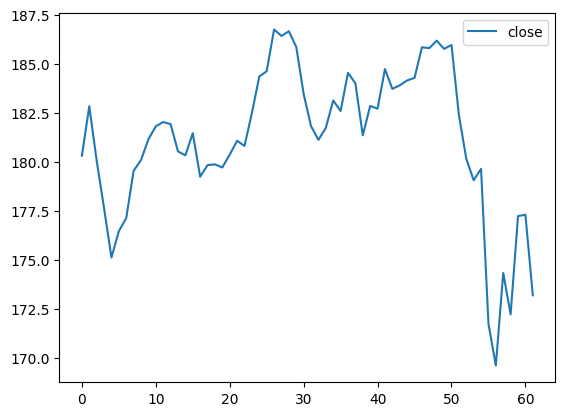

In [32]:
plt.plot(np.arange(len(close)), close, label="close")
plt.legend()
plt.show()

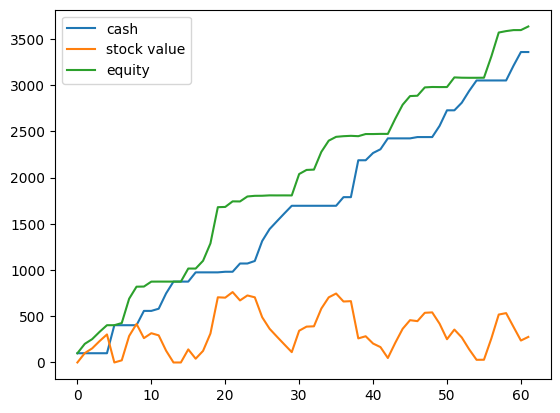

In [33]:
plt.plot(np.arange(len(close)), cash, label="cash")
plt.plot(np.arange(len(close)), np.array(long) * np.array(close), label="stock value")
plt.plot(np.arange(len(close)), equity, label="equity")
plt.legend()
plt.show()